# Numpy.Random

## Purpose of the Package

In [1]:
# Firstly import all modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### What is Numpy & Numpy.random

"Numpy (Numerical Python) is an open source Python library that’s used in almost every field of science and engineering. It’s the universal standard for working with numerical data in Python, and it’s at the core of the scientific Python and PyData ecosystems.[1]

Numpy.random is a built in package within Numpy which can produce pseudo random nunbers using combinations of a BitGenerator to create sequences and a generator to use those sequences to sample form different statistical distributions[2]. Essentially numpy.random generates whole arrays of seemingly random data spread across a probability distribution.

From randomising initial weights in an artificial nerural network, splitting data into random sets, or shuffling the data within your dataset, the ability ot generate random data is essential to any data analyst/ statistician or enthusiast.

## Simple Random Data

From the Random Generator documentation[3] there are 4 sub-categories of simple random data generators:

1. integers (rng.integers)
2. random (rng.random)
3. choice (rng.choice)
4. bytes (.bytes)


#### 1. Integers (rng.integers)
Generator.integers(low, high=None, size=None, dtype=np.int64, endpoint=False)
      
      "Returns random integers from low(inclusive) to hight(exclusiuve),or if endpoint=True, low (inclusive) to high (inclusive)"[4]
      
The above essentially means that .integers returns random integers inclusive of the low, up to but not including the high point. It will return an invclusive endpoint if endpoint = Ture
   
Let's explore the above in a bit more detail.

In [2]:
rng = np.random.default_rng()
rng.integers(3,size=(15))

array([2, 0, 2, 1, 0, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1], dtype=int64)

So we can see in the above output is an array of 15 numbers between 0 & 2, so therefore our rng.integers(3, size=15) has used the low of 3 as an exclusive endpoint and 0 as an inclusive startpoint, this is due tpo no endpoint being provided, the size =15 is quite obviously the number of ints to be produced.

We can further amend our code to provide even more dynamic arrays, for example a 3x15 array

In [3]:
rng.integers(3,size=(3,15))

array([[1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 1, 0, 2, 2],
       [2, 0, 1, 0, 2, 2, 2, 1, 1, 0, 2, 2, 2, 1, 2],
       [0, 1, 0, 1, 2, 0, 2, 1, 1, 1, 1, 2, 1, 0, 2]], dtype=int64)

Ok, so let's explore how the random numbers are distributed when generated rtandomly between 1 & 4. In order to get a fair representation of how these numbers are distriburted we will pass in a size of 1,000. We should expect about 250 results for each number between 1 - 4 if the selection is following the “discrete uniform” distribution.

In [4]:
xint = rng.integers(1, 5,size = 1000)

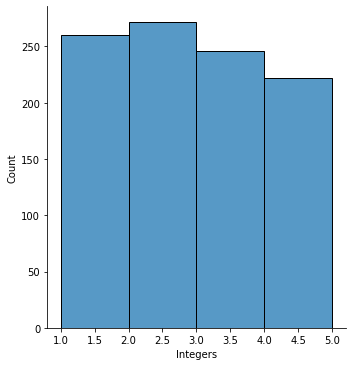

In [5]:
ax = sns.displot(xint,bins = [1,2,3,4,5])
ax.set(xlabel = "Integers")
plt.show()

So for a sample size of 1000, we get a somewhat even distribution, but not quite what we had envisioned. If we increase the size of the array, we should see the graph trend towards a more even distribution. (size = 10,000)

In [6]:
xint = rng.integers(1, 5,size = 10000)

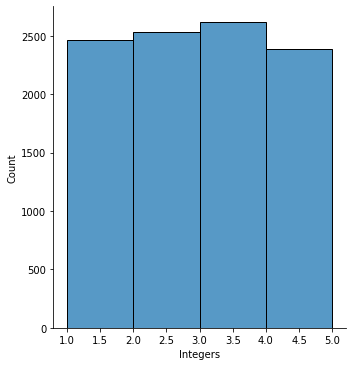

In [7]:
ax = sns.displot(xint,bins = [1,2,3,4,5])
ax.set(xlabel = "Integers")
plt.show()

The results of are trending towards an even distribution of 25% each, we can expect as as size variable increases the graphed variance in cumulative results will decrease. 

#### 2. Random (rng.random)
Generator.random(size=None, dtype=np.float64, out=None)
    
    "Return random floats in the half-open interval [0.0, 1.0].[5]"
    
So rng.random will provide and array of random floating point numbers between 0 and 1, of a specified size.

Let's see what this means.

In [8]:
rng = np.random.default_rng()
xrand = rng.random()
xrand

0.1735476969455072

Above we can see rng.random has produced a floating point number between 0 & 1, see type check below:

In [9]:
type(xrand)

float

So as with rng.integers above we will see what sort of distribution the integers are produced at ofr 1000 results.

In [10]:
xrand = rng.random(1000)

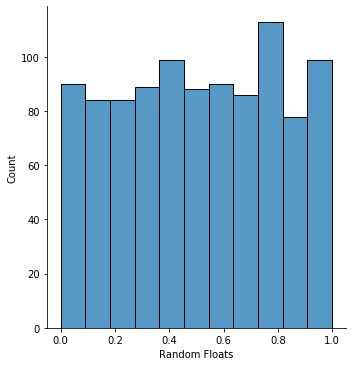

In [11]:
ax = sns.displot(xrand)
ax.set(xlabel = "Random Floats")
plt.show()

Do we see the same results as before with the graph trending towards an even distribution when increasing the size of our array?

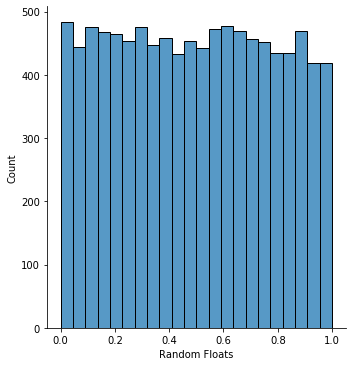

In [12]:
xrand = rng.random(10000)
ax = sns.displot(xrand)
ax.set(xlabel = "Random Floats")
plt.show()

It appears that the vaiance is slightly less than a size of 1000, but the difference here is not as pronounced as with the random.integers function, however the overall distribution appears to be fairly even it may be necessary to expand the size of the array further to get better data:


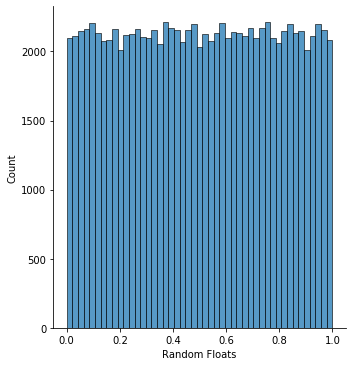

In [13]:
xrand = rng.random(100000)
ax = sns.displot(xrand)
ax.set(xlabel = "Random Floats")
plt.show()

As we can see from above, the graphs are again tranding towards a uniform distribution. We can explian the requirement for further increasing the size of the array's to see the same results given that we were instructing Numpy to select floats at random between 0 &  1, rather than just pick one of 4 as per rng.integers above.

#### 3. Choice (rng.choice)

 Generator.choice(a, size=None, replace=True, p=None, axis=0, shuffle=True)
 
     "Generates a random sample from a given 1-D array"[6]
     
Pretty self-explainatory - let's see how the random sampling works in practice.

In [14]:
rng.choice(4, 50)

array([2, 0, 2, 1, 2, 1, 1, 0, 2, 2, 1, 1, 3, 2, 1, 3, 1, 3, 1, 3, 2, 2,
       2, 1, 1, 3, 2, 0, 1, 3, 3, 3, 3, 1, 3, 2, 3, 0, 1, 2, 0, 1, 1, 0,
       1, 0, 1, 3, 1, 2], dtype=int64)

Above the choice function seems to pick integers between a start point of 0 and an exclusive endpoint of 4, or as the documentation states and array of np.arrange(a) where a is the first argument of the function (in our case above: 4). rng.choice(a, 50) will return 50 results. As per the above modules, let's map this out in visual data and see how rng.choice's distribution will compare.

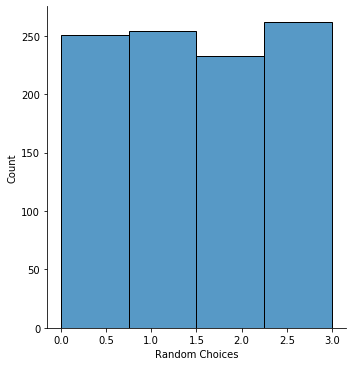

In [15]:
xcho = rng.choice((4), 1000)
ax = sns.displot(xcho, bins= 4)
ax.set(xlabel = "Random Choices")
plt.show()

As with the previous modules we will expand out the size of the array and we should see our resultant graph trend towards a uniform distribution.

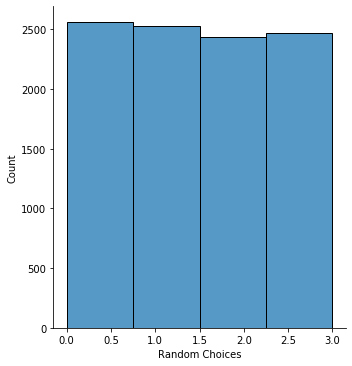

In [16]:
xcho = rng.choice((4), 10000)
ax = sns.displot(xcho, bins = 4) 
ax.set(xlabel = "Random Choices")
plt.show()

One quirk of the rng.choice function is that we can weight the results using the 'p' argument. In the below graph we should see our 4 random choices weighted per our p argument, the weighhts correspond to the indexes of the np.arrange(n) discussed above.

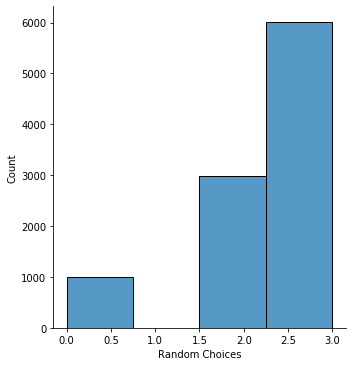

In [17]:
xcho = rng.choice((4), 10000,  p=[0.1, 0, 0.3, 0.6])
ax = sns.displot(xcho, bins  = 4)
ax.set(xlabel = "Random Choices")
plt.show()

## Permutations

The next sub-category within the numpy.random package is Permuations, which deals with the re-arranging or mixing of values within an array or sequence, without changing it's overall contents. The two modules are: 

1. shuffle
2. permutation

### 1. Shuffle

 Generator.shuffle(x, axis=0)
     
     "Modify a sequence in-place by shuffling its contents.
      The order of sub-arrays is changed but their contents remains the same."[7]
      
The above is fair concise, so let's see what happens in practice when we use this shuffle method.

We will just start with a random array of numbers

In [18]:
shuf = rng.integers(1, 10, size = 10)
shuf

array([7, 3, 3, 5, 5, 9, 7, 9, 8, 7], dtype=int64)

Now we will pass our array shuf through the shuffle function as an argument, the position or each value has now been shuffled. It is worth noting that this shuffle changes the value of the variable shuf to the new arrangement. i.e when we call shuf from this point on we will get the now-shuffled list/array back.

In [19]:
rng.shuffle(shuf)
shuf

array([8, 7, 3, 5, 9, 9, 7, 7, 5, 3], dtype=int64)

### 2. Permutation

 Generator.permutation(x, axis=0)
 
     "Randomly permute a sequence, or return a permuted range."[8]
     
As with the above, the description of what this function does is stragight forward, let's see what it does.

In [20]:
perm = rng.integers(1, 10, size = 10)
perm

array([7, 5, 6, 5, 6, 1, 1, 7, 5, 9], dtype=int64)

In [21]:
rng.permutation(perm)

array([7, 1, 6, 7, 5, 9, 5, 5, 1, 6], dtype=int64)

Ok, we can see that the aray has been permuted, but when we call the perm variable, below, we can see that the original array is returned, so unlike shuffle, permutation will not change the status of the varialbe passed through the function. in order to capture the permutation and use it again, we must assign a varialbe to it.

In [22]:
perm

array([7, 5, 6, 5, 6, 1, 1, 7, 5, 9], dtype=int64)

In [23]:
perm2= rng.permutation(perm)
perm2

array([6, 6, 1, 5, 7, 9, 7, 1, 5, 5], dtype=int64)

In [24]:
print(perm)
print(perm2)

[7 5 6 5 6 1 1 7 5 9]
[6 6 1 5 7 9 7 1 5 5]


## Distributions

1. Binomial
2. Poisson
3. Standard Normal
4. Uniform
5. Normal (Gaussian)

References:

1 - https://numpy.org/doc/stable/user/absolute_beginners.html

2 - https://numpy.org/doc/stable/reference/random/index.html

3 - https://numpy.org/doc/stable/reference/random/generator.html

4 - https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html#numpy.random.Generator.integers

5 - https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html#numpy.random.Generator.random

6 - https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice

7 - https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html#numpy.random.Generator.shuffle

8 - https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permutation.html#numpy.random.Generator.permutation